## Question 1 - Extracting Tesla Stock Data Using yfinance

In [18]:
#!install yfinance

In [46]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [28]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-10-23 00:00:00-04:00  420.000000  449.399994  413.899994  448.980011   
2025-10-24 00:00:00-04:00  446.829987  451.679993  430.170013  433.720001   
2025-10-27 00:00:00-04:00  439.980011  460.160004  438.690002  452.420013   
2025-10-28 00:00:00-04:00  454.779999  467.000000  451.600006  460.549988   
2025-10-29 00:00:00-04:00  462.424988  463.290009  461.500000  463.549988   

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.

In [32]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

Use the `requests` library to download the webpage `https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue`. Save the text of the response as a variable named `html_data`.

Parse the html_data using `beatiful_soup`.

In [63]:
#!pip install selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# 1. Open the browser
driver = webdriver.Chrome()  # 혹은 ChromeDriver 경로 지정 필요
driver.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")

# 2. waiting page loading
time.sleep(3)

# 3. Load the HTML
html_data = driver.page_source
soup = BeautifulSoup(html_data, "html.parser")

# 4. Print the title
print(soup.title)

# 5. Quit
driver.quit()


<title>Tesla Revenue 2011-2025 | TSLA | MacroTrends</title>


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [77]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index = True)
print(tesla_revenue)

          Date  Revenue
0   2025-06-30  $22,496
1   2025-03-31  $19,335
2   2024-12-31  $25,707
3   2024-09-30  $25,182
4   2024-06-30  $25,500
5   2024-03-31  $21,301
6   2023-12-31  $25,167
7   2023-09-30  $23,350
8   2023-06-30  $24,927
9   2023-03-31  $23,329
10  2022-12-31  $24,318
11  2022-09-30  $21,454
12  2022-06-30  $16,934
13  2022-03-31  $18,756
14  2021-12-31  $17,719
15  2021-09-30  $13,757
16  2021-06-30  $11,958
17  2021-03-31  $10,389
18  2020-12-31  $10,744
19  2020-09-30   $8,771
20  2020-06-30   $6,036
21  2020-03-31   $5,985
22  2019-12-31   $7,384
23  2019-09-30   $6,303
24  2019-06-30   $6,350
25  2019-03-31   $4,541
26  2018-12-31   $7,226
27  2018-09-30   $6,824
28  2018-06-30   $4,002
29  2018-03-31   $3,409
30  2017-12-31   $3,288
31  2017-09-30   $2,985
32  2017-06-30   $2,790
33  2017-03-31   $2,696
34  2016-12-31   $2,285
35  2016-09-30   $2,298
36  2016-06-30   $1,270
37  2016-03-31   $1,147
38  2015-12-31   $1,214
39  2015-09-30     $937
40  2015-06-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column.

In [84]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'[\,$]', '', regex=True)
print(tesla_revenue)

          Date Revenue
0   2025-06-30   22496
1   2025-03-31   19335
2   2024-12-31   25707
3   2024-09-30   25182
4   2024-06-30   25500
5   2024-03-31   21301
6   2023-12-31   25167
7   2023-09-30   23350
8   2023-06-30   24927
9   2023-03-31   23329
10  2022-12-31   24318
11  2022-09-30   21454
12  2022-06-30   16934
13  2022-03-31   18756
14  2021-12-31   17719
15  2021-09-30   13757
16  2021-06-30   11958
17  2021-03-31   10389
18  2020-12-31   10744
19  2020-09-30    8771
20  2020-06-30    6036
21  2020-03-31    5985
22  2019-12-31    7384
23  2019-09-30    6303
24  2019-06-30    6350
25  2019-03-31    4541
26  2018-12-31    7226
27  2018-09-30    6824
28  2018-06-30    4002
29  2018-03-31    3409
30  2017-12-31    3288
31  2017-09-30    2985
32  2017-06-30    2790
33  2017-03-31    2696
34  2016-12-31    2285
35  2016-09-30    2298
36  2016-06-30    1270
37  2016-03-31    1147
38  2015-12-31    1214
39  2015-09-30     937
40  2015-06-30     955
41  2015-03-31     940
42  2014-12

Execute the following lines to remove an null or empty strings in the Revenue column.

In [89]:
tesla_revenue.dropna(inplace=True)

tesla_remove = tesla_revenue[tesla_revenue['Revenue'] != '']
print(tesla_revenue)

          Date Revenue
0   2025-06-30   22496
1   2025-03-31   19335
2   2024-12-31   25707
3   2024-09-30   25182
4   2024-06-30   25500
5   2024-03-31   21301
6   2023-12-31   25167
7   2023-09-30   23350
8   2023-06-30   24927
9   2023-03-31   23329
10  2022-12-31   24318
11  2022-09-30   21454
12  2022-06-30   16934
13  2022-03-31   18756
14  2021-12-31   17719
15  2021-09-30   13757
16  2021-06-30   11958
17  2021-03-31   10389
18  2020-12-31   10744
19  2020-09-30    8771
20  2020-06-30    6036
21  2020-03-31    5985
22  2019-12-31    7384
23  2019-09-30    6303
24  2019-06-30    6350
25  2019-03-31    4541
26  2018-12-31    7226
27  2018-09-30    6824
28  2018-06-30    4002
29  2018-03-31    3409
30  2017-12-31    3288
31  2017-09-30    2985
32  2017-06-30    2790
33  2017-03-31    2696
34  2016-12-31    2285
35  2016-09-30    2298
36  2016-06-30    1270
37  2016-03-31    1147
38  2015-12-31    1214
39  2015-09-30     937
40  2015-06-30     955
41  2015-03-31     940
42  2014-12

## Question 3 - Extracting GameStop Stock Data Using yfinance

Using `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [94]:
GameStop = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.

In [97]:
gme_data = GameStop.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function.

In [100]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

Use the `requests` library to download the webpage `https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01`. Save the text of the response as a vraiable named `html_data`.

And parse the html data using `beautiful_soup`.

In [110]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01'

# 1. Open the browser
driver = webdriver.Chrome()  # 혹은 ChromeDriver 경로 지정 필요
driver.get(url)

# 2. waiting page loading
time.sleep(3)

# 3. Load the HTML
html_data = driver.page_source
soup = BeautifulSoup(html_data, "html.parser")

# 4. Print the title
print(soup.title)

# 5. Quit
driver.quit()

<title>GameStop Revenue 2011-2025 | GME | MacroTrends</title>


In [116]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index = True)

gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\,$]', '', regex=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
print(gme_revenue)

          Date Revenue
0   2025-07-31     972
1   2025-04-30     732
2   2025-01-31    1283
3   2024-10-31     860
4   2024-07-31     798
5   2024-04-30     882
6   2024-01-31    1794
7   2023-10-31    1078
8   2023-07-31    1164
9   2023-04-30    1237
10  2023-01-31    2226
11  2022-10-31    1186
12  2022-07-31    1136
13  2022-04-30    1378
14  2022-01-31    2254
15  2021-10-31    1297
16  2021-07-31    1183
17  2021-04-30    1277
18  2021-01-31    2122
19  2020-10-31    1005
20  2020-07-31     942
21  2020-04-30    1021
22  2020-01-31    2194
23  2019-10-31    1439
24  2019-07-31    1286
25  2019-04-30    1548
26  2019-01-31    3063
27  2018-10-31    1935
28  2018-07-31    1501
29  2018-04-30    1786
30  2018-01-31    2825
31  2017-10-31    1989
32  2017-07-31    1688
33  2017-04-30    2046
34  2017-01-31    2403
35  2016-10-31    1959
36  2016-07-31    1632
37  2016-04-30    1972
38  2016-01-31    3525
39  2015-10-31    2016
40  2015-07-31    1762
41  2015-04-30    2061
42  2015-01

## Question 5 - Tesla Stock and Revenue Dashboard

<Axes: xlabel='Date'>

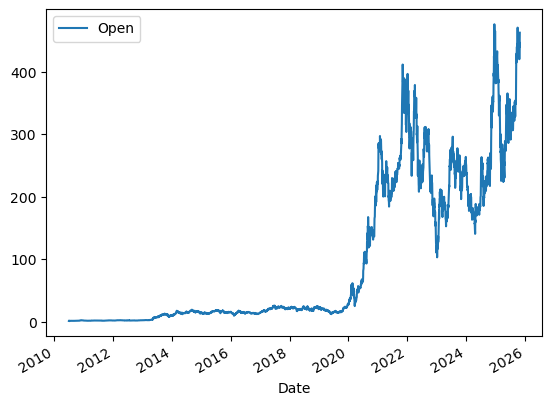

In [131]:
tesla_data.plot(x='Date',y='Open')

<Axes: xlabel='Date'>

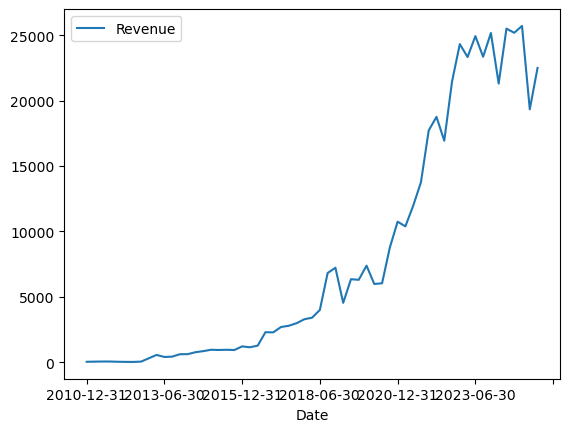

In [137]:
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])
tesla_revenue = tesla_revenue.sort_values(by='Date', ascending=True)
tesla_revenue.plot(x='Date', y='Revenue')

## Question 6 - GameStop Stock and Revenue Dashboard

<Axes: xlabel='Date'>

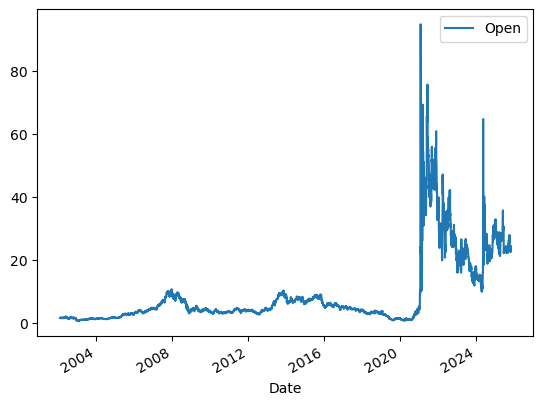

In [141]:
gme_data.plot(x='Date', y='Open')

<Axes: xlabel='Date'>

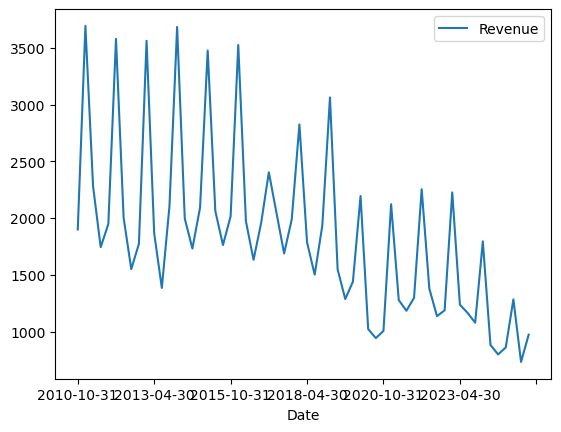

In [143]:
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])
gme_revenue = gme_revenue.sort_values(by='Date', ascending=True)
gme_revenue.plot(x='Date', y='Revenue')